In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('house.csv')
house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


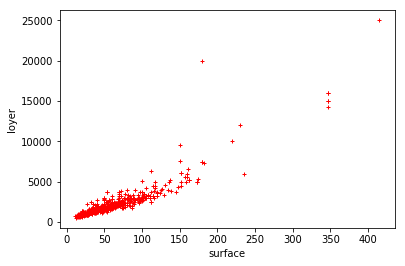

In [3]:
ax = plt.axes()
ax.set(xlabel='surface', ylabel='loyer')
plt.plot(house_data.surface, house_data.loyer, 'r+', markersize=4)
plt.show()

In [4]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].as_matrix()]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[-283.37836117]
 [  40.97116431]]


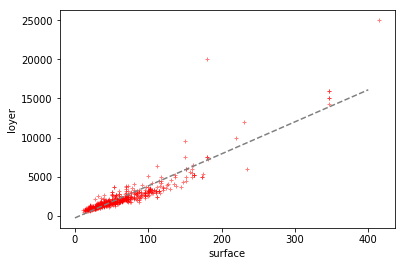

In [5]:
ax = plt.axes()
ax.set(xlabel='surface', ylabel='loyer')
plt.plot(house_data.surface, house_data.loyer, 'r+', markersize=4, alpha=.5)
plt.plot([0,400], [theta.item(0),theta.item(0) + 400 * theta.item(1)], linestyle='--', c='gray')
plt.show()

In [6]:
theta.item(0) + theta.item(1) * 35

1150.612389740233

## Echantillonage

In [7]:
data_size = house_data.shape[0]
sample = np.random.randint(data_size, size=data_size // 10)
sampled_data = house_data.iloc[sample]

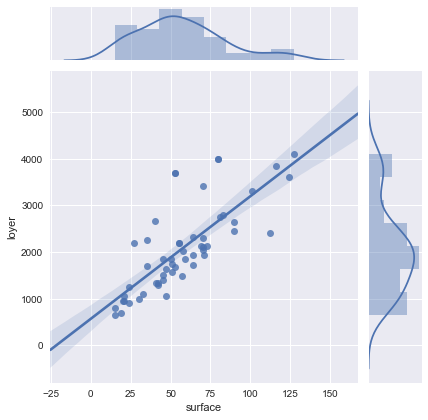

In [8]:
import seaborn as sns

sns.set()
sns.jointplot('surface','loyer',sampled_data,kind='reg',stat_func = None)

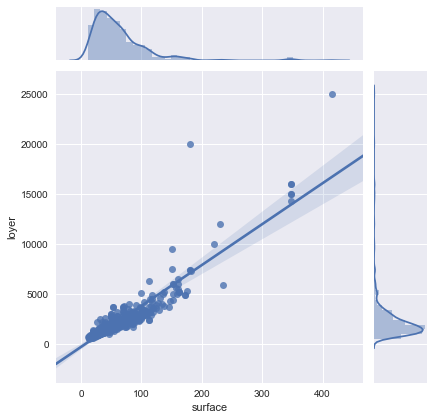

In [9]:
sns.jointplot('surface','loyer',house_data,kind='reg',stat_func = None)

## Training set/Testing set

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8)

In [11]:
xtest.shape

(436, 2)

In [12]:
xtrain.shape

(109, 2)